# Enunciado

Realizar el ejercicio 4 de Naive Bayes y KNN con árboles de decisión.

# 1. Importación de los datos

In [1]:
import pandas as pd
df = pd.read_csv("csv/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Sustituimos los espacio por guiones bajos
df.columns = [x.replace(" ", "_") for x in df.columns]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. Preparación de los datos

In [3]:
X = df.drop("quality", axis=1)
y = df["quality"]

# 4. Visualización de la distribución de los datos

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


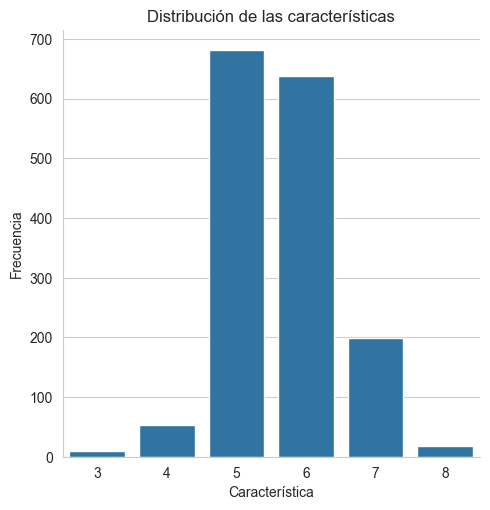

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
print(df["quality"].groupby(df["quality"]).size())
sns.catplot(x="quality", kind="count", data=df)
plt.title('Distribución de las características')
plt.xlabel('Característica')
plt.ylabel('Frecuencia')
plt.show()

# 5. Preparación del conjunto de datos

In [5]:
from sklearn.model_selection import train_test_split

p_train = 0.7

train, test = train_test_split(df, train_size=p_train, random_state=42)

# inplace=True: Modifica el dataframe original en lugar de devolver uno nuevo
train.reset_index(inplace=True)
test.reset_index(inplace=True)

print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

print("Conjunto de entrenamiento:")
print(train.head())

print("Conjunto de prueba:")
print(test.head())

Train: (1119, 13)
Test: (480, 13)
Conjunto de entrenamiento:
   index  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0    925            8.6              0.22         0.36             1.9   
1    363           12.5              0.46         0.63             2.0   
2    906            7.2              0.54         0.27             2.6   
3    426            6.4              0.67         0.08             2.1   
4   1251            7.5              0.58         0.14             2.2   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.064                 53.0                  77.0  0.99604  3.47   
1      0.071                  6.0                  15.0  0.99880  2.99   
2      0.084                 12.0                  78.0  0.99640  3.39   
3      0.045                 19.0                  48.0  0.99490  3.49   
4      0.077                 27.0                  60.0  0.99630  3.28   

   sulphates  alcohol  quality  
0       0.87    

# 6. Validación cruzada

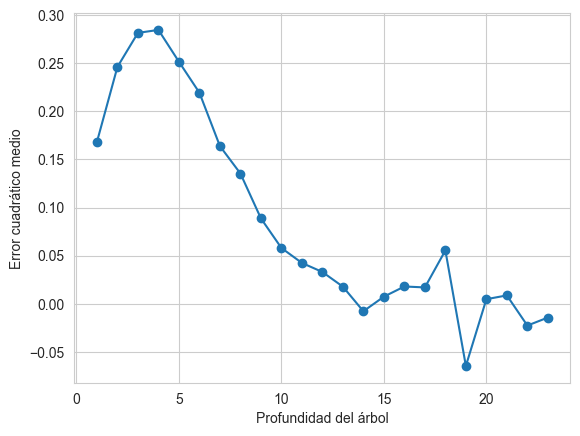

In [6]:
from sklearn import tree
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

cv = KFold(n_splits=5, shuffle=False)
accuracies = list()
max_attributes = len(list(df))
depth_range = range(1, max_attributes * 2)

# Testeamos la profundidad de los árboles
for depth in depth_range:
    fold_accuracy = []  # Reiniciamos la lista para cada profundidad
    tree_model = tree.DecisionTreeRegressor(
        criterion='squared_error', # Error cuadrático
        max_depth=depth
    )
    for train_fold, test_fold in cv.split(train):
        f_train = train.loc[train_fold] 
        f_test = train.loc[test_fold] 

        model = tree_model.fit(X=f_train.drop(['quality'], axis=1),
                               y=f_train['quality'])
        
        test_acc = model.score(X=f_test.drop(['quality'], axis=1),
                               y=f_test['quality'])
        
        fold_accuracy.append(test_acc)
    
    accuracies.append(np.mean(fold_accuracy))

# Mostramos los resultados
plt.plot(depth_range, accuracies, marker='o')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Error cuadrático medio')
plt.show()

# Obtenemos la mejor profundidad
best_depth = depth_range[np.argmax(accuracies)]

# 7. Creación del modelo

In [7]:
from sklearn.metrics import mean_squared_error

X_train = train.drop("quality", axis=1)
y_train = train["quality"]
X_test = test.drop("quality", axis=1)
y_test = test["quality"]

model = tree.DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=best_depth
)

model = model.fit(X=X_train, y=y_train)

y_pred = model.predict(X_test)

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 0.4721118538344003


# 8. Visualización del modelo

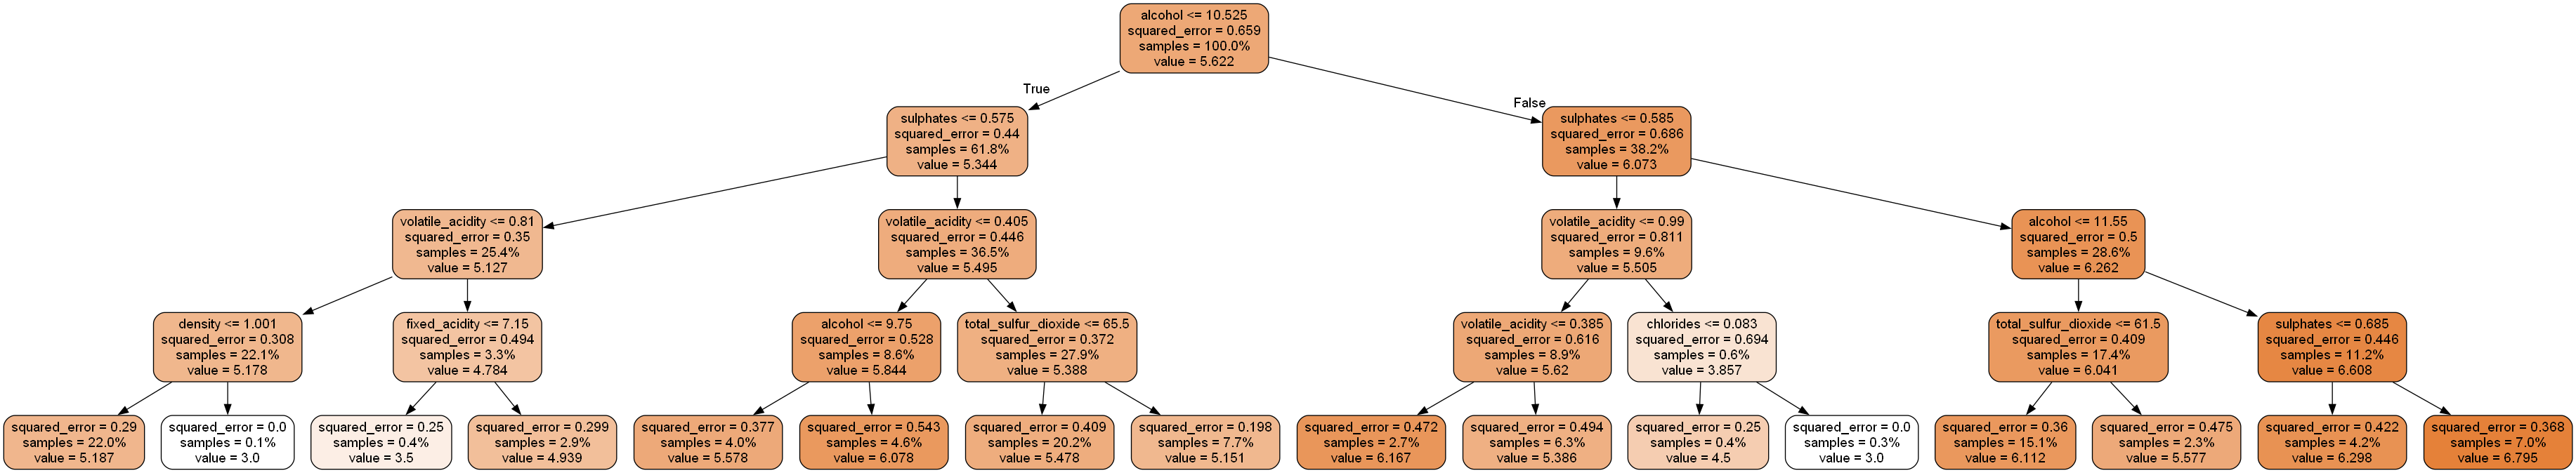

In [8]:
import pydot
from IPython.display import Image
from sklearn import tree
from io import StringIO

dot_data = StringIO()
tree.export_graphviz(
    model, 
    out_file=dot_data, 
    proportion=True,
    feature_names=X_train.columns,
    rounded=True,
    filled=True
)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())